In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

/Users/JLow/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
buys = pd.read_csv('../preProcessing/buys_encoded.csv', index_col=0)
buys.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Clarksburg,city_Elk Grove,city_Elverta,city_Fair Oaks,city_Folsom,city_Gold River,city_Mather,...,zipcode_95864,beds,baths,square_footage,lot_size,year_built,num_rooms,num_parking,num_stories,price
0,0,0,0,0,0,0,0,0,0,0,...,0,4.0,2.0,1689.0,11325.6,1946.0,8.0,1.0,1.0,390000
1,0,0,0,0,0,0,0,0,0,0,...,0,5.0,3.0,3020.0,6199.0,2016.0,9.0,3.0,2.0,529900
2,0,0,0,0,0,0,0,0,0,0,...,0,4.0,2.0,1420.0,4729.0,1983.0,7.0,2.0,1.0,368900
3,0,0,0,0,0,0,0,0,0,0,...,0,4.0,3.0,2918.0,7439.0,1998.0,9.0,2.0,2.0,470000
4,0,0,0,0,0,0,0,0,0,0,...,0,4.0,3.0,1903.0,6970.0,1955.0,7.0,2.0,1.0,375000


In [49]:
buys.shape

(2335, 292)

In [31]:
X_buys = buys.iloc[:,:-1]
y_buys = buys['price'].values.reshape(-1,1)
y_buys

array([[390000],
       [529900],
       [368900],
       ...,
       [455500],
       [736769],
       [246240]])

In [6]:
X_buys_train, X_buys_test, y_buys_train, y_buys_test = train_test_split(X_buys, y_buys, random_state=42)
X_buys_train.head()

,city_Antelope,city_Carmichael,city_Citrus Heights,city_Clarksburg,city_Elk Grove,city_Elverta,city_Fair Oaks,city_Folsom,city_Gold River,city_Mather,...,zipcode_95843,zipcode_95864,beds,baths,square_footage,lot_size,year_built,num_rooms,num_parking,num_stories
610,0,0,0,0,0,0,0,0,0,0,...,0,0,9.0,8.0,4209.0,6534.0,1880.0,6.0,4.0,3.0
2762,0,0,1,0,0,0,0,0,0,0,...,0,0,3.0,2.0,1708.0,9148.0,1979.0,6.0,2.0,1.0
1196,0,0,0,0,0,0,0,0,0,0,...,0,0,2.0,2.5,808.0,6098.0,1939.0,4.0,1.0,1.0
1334,0,0,0,0,1,0,0,0,0,0,...,0,0,3.0,3.0,1576.0,3171.0,2020.0,6.0,2.0,2.0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,4.0,3.0,3653.0,5996.0,2017.0,13.0,2.0,2.0


In [17]:
X_buys_scaler = StandardScaler().fit(X_buys_train)
y_buys_scaler = StandardScaler().fit(y_buys_train)

In [32]:
X_buys_train_scaled = X_buys_scaler.transform(X_buys_train)
X_buys_test_scaled = X_buys_scaler.transform(X_buys_test)
y_buys_train_scaled = y_buys_scaler.transform(y_buys_train)
y_buys_test_scaled = y_buys_scaler.transform(y_buys_test)
y_buys_train_scaled

array([[ 2.52219791],
       [-0.12741918],
       [-0.66723408],
       ...,
       [-0.79042004],
       [-0.25803878],
       [-0.35668126]])

In [9]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [21]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [97]:
def build_model():
  model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[len(X_buys_train.columns)]),
    layers.Dense(33, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [98]:
model = build_model()

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 300)               87600     
_________________________________________________________________
dense_44 (Dense)             (None, 33)                9933      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 34        
Total params: 97,567
Trainable params: 97,567
Non-trainable params: 0
_________________________________________________________________


In [99]:
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(
  X_buys_train_scaled, y_buys_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:495184994444.4343,  mae:503146.4688,  mse:495185035264.0000,  val_loss:285969434863.2251,  val_mae:450746.7500,  val_mse:285969448960.0000,  
....................................................................................................
Epoch: 100, loss:145134298117.8514,  mae:171160.8281,  mse:145134305280.0000,  val_loss:81831553683.3276,  val_mae:186703.3750,  val_mse:81831559168.0000,  
....................................................................................................
Epoch: 200, loss:101032941029.6686,  mae:134613.1562,  mse:101032935424.0000,  val_loss:68112508863.8177,  val_mae:168754.3906,  val_mse:68112510976.0000,  
....................................................................................................
Epoch: 300, loss:78731133963.7029,  mae:115835.1094,  mse:78731116544.0000,  val_loss:65412638259.0541,  val_mae:159301.9531,  val_mse:65412636672.0000,  
..........

In [100]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
305,7.782373e+10,115021.414062,7.782373e+10,6.544277e+10,159099.968750,6.544277e+10,305
306,7.767677e+10,114915.289062,7.767678e+10,6.547774e+10,159121.203125,6.547775e+10,306
307,7.743532e+10,114960.757812,7.743531e+10,6.547001e+10,159012.828125,6.547001e+10,307
308,7.728696e+10,114664.671875,7.728697e+10,6.549828e+10,158994.265625,6.549828e+10,308
309,7.728698e+10,114221.500000,7.728697e+10,6.539553e+10,158720.328125,6.539553e+10,309


In [101]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Price]')

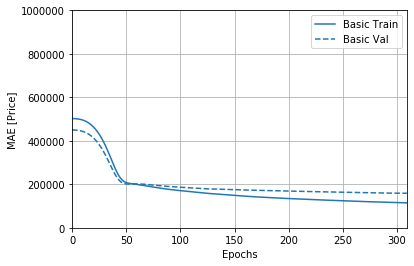

In [102]:
import matplotlib.pyplot as plt

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 1000000])
plt.ylabel('MAE [Price]')

Text(0, 0.5, 'MSE [Price^2]')

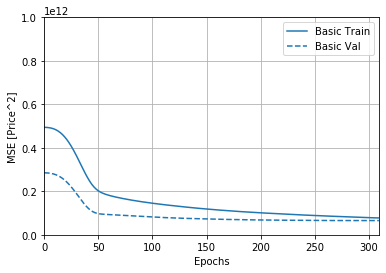

In [103]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1000000000000])
plt.ylabel('MSE [Price^2]')

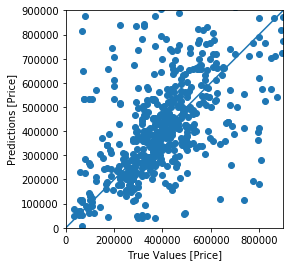

In [106]:
test_predictions = model.predict(X_buys_test_scaled).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_buys_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 900000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


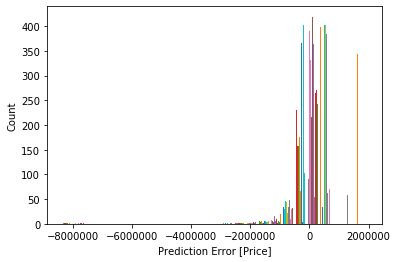

In [107]:
error = test_predictions - y_buys_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")